$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº1 | Visualización y pre-procesamiento de datos}$$


- _Jesus Alvarado H._

# A. Introducción

En este taller abordaremos algunas herramientas importantes en la evaluación de datasets moleculares. Iniciaremos por la disponibilidad de los datos (sin profundizar en el filtrado y generación de descriptores), importancia del fenómeno en estudio y la problemática asociada, para luego realizar un análisis exploratorio y preprocesamiento, finalmente evaluaremos de manera superficial algunas métricas y gráficas. Al final de este notebook se explica con detalle los objetivos del challenge y el entregable.

# B. Problemática y disposición de los datos

Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ejemplo 1:

Podemos analizar información de tablas empleando pandas a partir de la URL. Tomemos el siguiente ejemplo (http://dx.doi.org/10.37761/rsqp.v89i1.425):

In [ ]:
pagina = pd.read_html("http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es")

In [ ]:
tabla = pagina[0]
tabla

In [ ]:
df = tabla.T
df

In [ ]:
df.iloc[0,:]

In [ ]:
df.iloc[1,1]

In [ ]:
plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.xlabel("Elemento")
plt.ylabel("Z")

In [ ]:
#plt.title("Número atómico")
plt.bar(df.iloc[1:4,0],df.iloc[1:4,1])
plt.bar(df.iloc[1:4,17],df.iloc[1:4,1])
#plt.xlabel("Elemento")
#plt.ylabel("Z")

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

ax[0].bar(df.iloc[1:4,0],df.iloc[1:4,1],color="green")
ax[1].bar(df.iloc[1:4,0],df.iloc[1:4,17],color="orange")

In [ ]:
df.drop(index = 0, inplace= True)
df

## Ejemplo 2:

Queremos disponer de todos los SMILES contenidos en https://perunpdb.com.pe/

In [ ]:
# Realiza web scrapping para obtener estas representaciones moleculares en un dataframe
# https://github.com/inefable12/herramientas_basicas/blob/main/webscrapping2023_Selenium.ipynb

In [ ]:
# SMILES: https://github.com/inefable12/herramientas_basicas/blob/main/perunpdb1.csv
# Matriz X (sideróforos filtrados): https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/padel_83_1490.csv
# Target Y: https://github.com/inefable12/Exploracion_insilico_2024/blob/main/catecol_complementario/FEB_catechol83.csv

## Ejemplo 3:

A partir de nuestra base de datos formada por compuestos químicos provenientes de 17 plantas de Puno y experimentos in silico (acoplamiento molecular) con una de las proteínas de interés farmacológico en el SARS-CoV-2, la proteasa principal, queremos conocer la distribución de los valores de energía de acoplamiento (docking score) respecto de cada planta en boxplots.

In [ ]:
df0 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/MDG202_cl2.csv",index_col="CID")
df0.head(3)

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/upch_rp_2023/main/mdg_glide_score2023_cl2.csv",index_col="CID",sep=";")
df1.head(3)

In [ ]:
df = df0.merge(df1, how='inner', left_index=True, right_index=True)

In [ ]:
df.shape

In [ ]:
df['PLANT'].values

In [ ]:
df['PLANT'].unique()

In [ ]:
df['PLANT'] = np.where(df['PLANT']=='Capsella bursa ','Capsella bursa',df['PLANT'])

In [ ]:
list(df.columns)

In [ ]:
df.drop(['NAME','IUPAC','ISOMERIC_SMILES','NUMBER','SMILES'],inplace=True,axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [ ]:
df.info()

In [ ]:
ax = plt.subplot()
df['PLANT'].hist(figsize=(16,8),bins=20,width=0.5)
plt.xticks(rotation=45)
plt.xlabel('Plantas')
plt.ylabel('Número de compuestos por planta')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(16, 8))

###
ax = sns.boxplot(x='PLANT', y='docking score', data=df, ax=fig.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='PLANT', y='docking score', data=df, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Plants', fontsize=16, fontweight='bold')
plt.ylabel('Docking score', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show();


# C. Análisis Exploratorio de los Datos (EDA)

In [ ]:
# BD de cancer
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/C0708_Reconocimiento_Patrones_2024/main/cancer_challenge_cl2.csv", index_col=0)
df.head(3)

# Conociendo la data:
1. ¿Cuántos datos hay?
2. ¿Qué atributos tenemos?
3. ¿Qué tipos de datos tenemos?
4. ¿Tenemos valores faltantes?
5. ¿Cómo están distribuidos los datos?
6. ¿Hay valores extraños?
7. ¿Qué información tiene el target?
8. ¿Cuales y cuantas etiquetas tiene?
9. ¿Cómo están correlacionados los datos?
10. ¿Son útiles los datos correlacionados?

In [ ]:
#

# D. Preprocesamiento

1. Tratamiento de datos outliers
2. Normalización de la data

# E. Screening de ML

In [ ]:
# Sugerencia: lazypredict o pycaret

In [ ]:
# Ejemplo complementario
# https://colab.research.google.com/drive/1jntqMDjquG7j2sC-W-koWTaaQLrPnZ5T?authuser=7&pli=1#scrollTo=xZo2J8hRSy72

# F. Challenge

**Problemática**:

Existen moléculas con capacidad de permear a la membrana celular, esta es una característica importante en el desarrollo de fármacos. Sin embargo, en las células existen canales (proteínas) que permiten la entrada de moléculas específicas que no dependen de esta capacidad. Por ejemplo, la proteína FoxA, situada en la membrana bacterial, se "encarga" de la entrada de hierro (Fe3+).
Este metal es altamente reactivo, por lo cual, se encuentra "protegido" por una molécula orgánica, llamada sideróforo, producida por las mismas bacterias. Los microorganismos reconocen químicamente el sideróforo y se inicia la internalización del hierro-sideróforo a través del canal. La imitación de sideróforos es una vía ampliamente usada para el descubrimiento de nuevos fármacos con limitada capacidad de permeabilidad celular.

En el laboratorio desarrollamos una base de datos para cuantificar el reconocimiento molecular de hierro-sideróforos (ligando) en FoxA (receptor):
https://github.com/inefable12/fedfo_720/blob/main/FULLc.csv

FEBc (Free Energy Binding) es un indicador de la afinidad entre el ligando y el receptor. Cuanto más negativo FEBc, es mayor la afinidad.

**Objetivos**:

General: Aplicar EDA y preprocesamiento del dataset para la predicción de FEBc.

Específicos:

1. Identificar el tipo de modelo (agrupamiento, regresion, clasificacion, etc)
2. Justificar cada paso del EDA, destacando la utilidad de la información obtenida.
3. Realizar preprocesamiento a los datos
4. Realizar un screening de modelos de ML (pycaret, lazy predict, etc)
5. Analizar las métricas
6. Conclusiones.

Se usará un modelo de regresión

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, auc
# from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Perceptron
# from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
# from sklearn.svm import LinearSVC, SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.tree import DecisionTreeClassifier


In [38]:

!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [2]:
url = 'https://raw.githubusercontent.com/inefable12/fedfo_720/main/FULLc.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   r_mopac_Alpha_LUMO_Energy        720 non-null    float64
 1   r_mopac_Alpha_SOMO_Energy        720 non-null    float64
 2   r_mopac_Beta_LUMO_Energy         720 non-null    float64
 3   r_mopac_Beta_SOMO_Energy         720 non-null    float64
 4   r_mopac_Dipole                   720 non-null    float64
 5   r_mopac_Dipole_X                 720 non-null    float64
 6   r_mopac_Dipole_Y                 720 non-null    float64
 7   r_mopac_Dipole_Z                 720 non-null    float64
 8   r_mopac_Ionization_Energy        720 non-null    float64
 9   r_mopac_MOPAC_Heat_of_Formation  720 non-null    float64
 10  r_mopac_MOPAC_Total_Energy_EV    720 non-null    float64
 11  i_desc_Chirality_count           720 non-null    int64  
 12  PBF                   

In [12]:
df.head()

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Beta_LUMO_Energy,r_mopac_Beta_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,FEBc
0,-3.968,-9.466,-3.968,-9.438,40.425589,0.152708,-38.407425,12.612480,9.437856,-221.861111,...,8072.405855,11998.090776,0.401044,0.672808,4.488438,0.000140,0.916059,0.250954,0.126871,-8.6
1,-4.063,-9.469,-4.063,-9.802,39.060058,-3.593674,33.119289,20.393292,9.469243,-222.341607,...,7660.671610,11831.009210,0.423339,0.647508,4.450216,0.000129,0.905971,0.236470,0.140256,-8.9
2,-3.965,-9.595,-3.965,-9.972,38.679279,-11.327410,-29.596164,-22.177544,9.594976,-224.244498,...,21162.262055,24784.719154,0.178920,0.853843,6.381630,0.000193,0.983864,0.557125,0.073827,-6.5
3,-2.690,-10.853,-2.678,-10.772,11.913102,3.246030,-9.454733,6.480226,10.772271,-264.353086,...,7353.414791,11011.685049,0.480030,0.667783,4.375982,0.000126,0.877252,0.180351,0.215880,-9.2
4,-2.561,-10.662,-2.586,-11.066,13.122463,-5.019000,-7.402474,-9.602710,10.661890,-257.234743,...,8614.702940,12008.484424,0.405556,0.717385,4.543215,0.000147,0.914070,0.235406,0.192731,-10.9


In [13]:
df.head()

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Beta_LUMO_Energy,r_mopac_Beta_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,FEBc
0,-3.968,-9.466,-3.968,-9.438,40.425589,0.152708,-38.407425,12.612480,9.437856,-221.861111,...,8072.405855,11998.090776,0.401044,0.672808,4.488438,0.000140,0.916059,0.250954,0.126871,-8.6
1,-4.063,-9.469,-4.063,-9.802,39.060058,-3.593674,33.119289,20.393292,9.469243,-222.341607,...,7660.671610,11831.009210,0.423339,0.647508,4.450216,0.000129,0.905971,0.236470,0.140256,-8.9
2,-3.965,-9.595,-3.965,-9.972,38.679279,-11.327410,-29.596164,-22.177544,9.594976,-224.244498,...,21162.262055,24784.719154,0.178920,0.853843,6.381630,0.000193,0.983864,0.557125,0.073827,-6.5
3,-2.690,-10.853,-2.678,-10.772,11.913102,3.246030,-9.454733,6.480226,10.772271,-264.353086,...,7353.414791,11011.685049,0.480030,0.667783,4.375982,0.000126,0.877252,0.180351,0.215880,-9.2
4,-2.561,-10.662,-2.586,-11.066,13.122463,-5.019000,-7.402474,-9.602710,10.661890,-257.234743,...,8614.702940,12008.484424,0.405556,0.717385,4.543215,0.000147,0.914070,0.235406,0.192731,-10.9


In [14]:
df.columns

Index(['r_mopac_Alpha_LUMO_Energy', 'r_mopac_Alpha_SOMO_Energy',
       'r_mopac_Beta_LUMO_Energy', 'r_mopac_Beta_SOMO_Energy',
       'r_mopac_Dipole', 'r_mopac_Dipole_X', 'r_mopac_Dipole_Y',
       'r_mopac_Dipole_Z', 'r_mopac_Ionization_Energy',
       'r_mopac_MOPAC_Heat_of_Formation', 'r_mopac_MOPAC_Total_Energy_EV',
       'i_desc_Chirality_count', 'PBF', 'PMI1', 'PMI2', 'PMI3', 'NPR1', 'NPR2',
       'RadiusOfGyration', 'InertialShapeFactor', 'Eccentricity',
       'Asphericity', 'SpherocityIndex', 'FEBc'],
      dtype='object')

In [19]:
df.isnull().sum()

r_mopac_Alpha_LUMO_Energy          0
r_mopac_Alpha_SOMO_Energy          0
r_mopac_Dipole                     0
r_mopac_Dipole_X                   0
r_mopac_Dipole_Y                   0
r_mopac_Dipole_Z                   0
r_mopac_Ionization_Energy          0
r_mopac_MOPAC_Heat_of_Formation    0
i_desc_Chirality_count             0
PBF                                0
PMI1                               0
PMI2                               0
NPR1                               0
NPR2                               0
InertialShapeFactor                0
Eccentricity                       0
SpherocityIndex                    0
FEBc                               0
dtype: int64

Hay 720 datos, todos son no nulos y hay 24 columnas de datos

<Axes: >

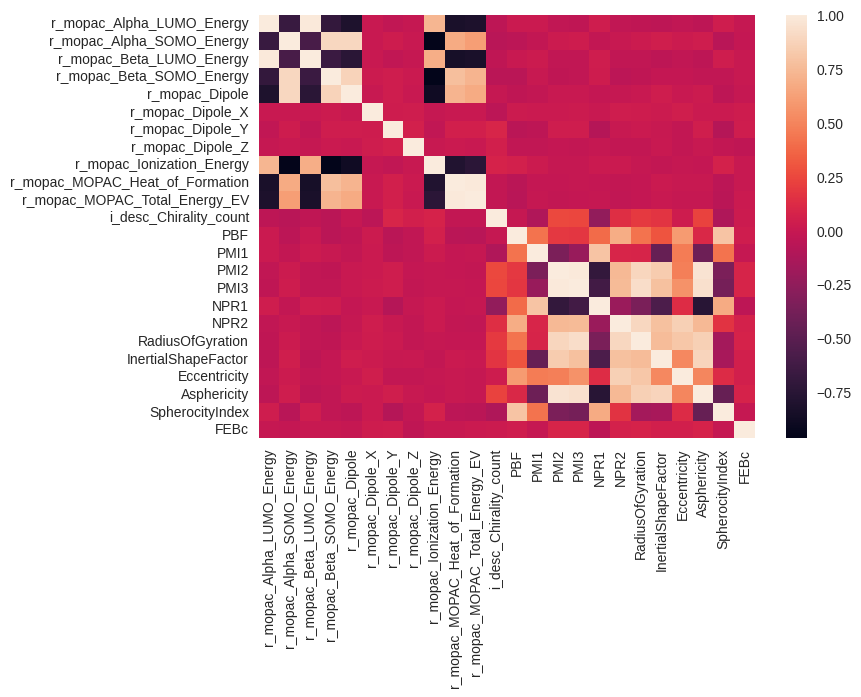

In [15]:
plt.figure()
sns.heatmap(df.corr())

In [16]:
corr_mat = df.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
df

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,i_desc_Chirality_count,PBF,PMI1,PMI2,NPR1,NPR2,InertialShapeFactor,Eccentricity,SpherocityIndex,FEBc
0,-3.968,-9.466,40.425589,0.152708,-38.407425,12.612480,9.437856,-221.861111,3,0.895309,4811.759861,8072.405855,0.401044,0.672808,0.000140,0.916059,0.126871,-8.6
1,-4.063,-9.469,39.060058,-3.593674,33.119289,20.393292,9.469243,-222.341607,2,0.915579,5008.533139,7660.671610,0.423339,0.647508,0.000129,0.905971,0.140256,-8.9
2,-3.965,-9.595,38.679279,-11.327410,-29.596164,-22.177544,9.594976,-224.244498,1,0.900915,4434.485333,21162.262055,0.178920,0.853843,0.000193,0.983864,0.073827,-6.5
3,-2.690,-10.853,11.913102,3.246030,-9.454733,6.480226,10.772271,-264.353086,2,1.141172,5285.941424,7353.414791,0.480030,0.667783,0.000126,0.877252,0.215880,-9.2
4,-2.561,-10.662,13.122463,-5.019000,-7.402474,-9.602710,10.661890,-257.234743,3,1.071897,4870.107577,8614.702940,0.405556,0.717385,0.000147,0.914070,0.192731,-10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-4.075,-9.582,36.057802,-14.430384,-32.745848,4.431541,9.581773,-224.604059,2,1.045323,5138.150501,13227.146075,0.304933,0.784988,0.000153,0.952374,0.158852,-10.2
716,-2.387,-10.202,16.939629,13.662031,-5.601080,8.302279,10.201681,-261.275541,2,1.310273,3988.843601,20476.516215,0.176569,0.906410,0.000227,0.984288,0.162607,-10.2
717,-2.856,-11.228,10.834239,2.914062,4.121680,-9.586487,11.227692,-273.694835,2,1.103802,4405.758140,37157.203888,0.111040,0.936487,0.000213,0.993816,0.074442,-6.7
718,-2.410,-10.100,24.937325,-6.091209,-24.081866,-2.197976,10.014902,-254.655795,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.0


<Axes: >

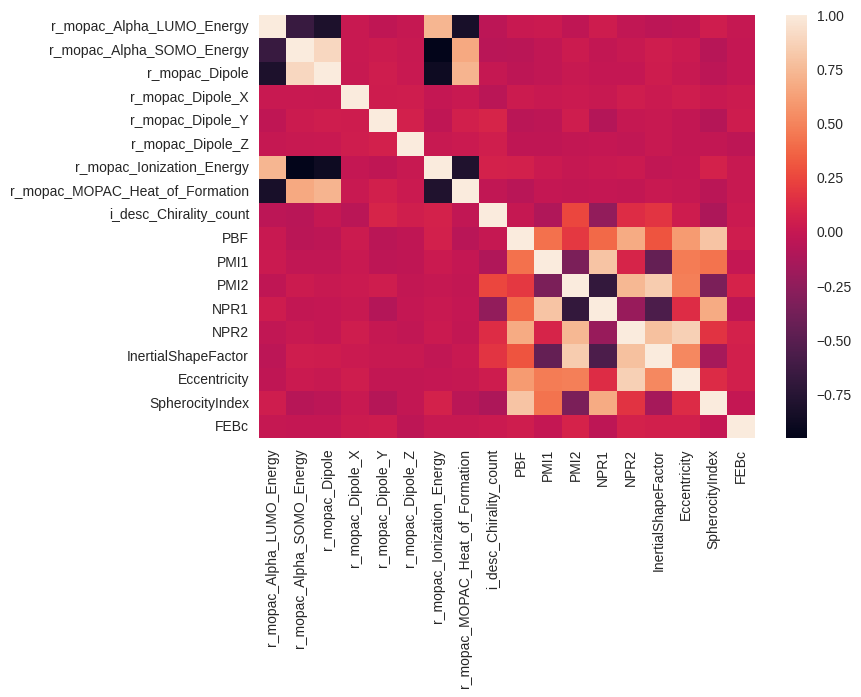

In [17]:
sns.heatmap(df.corr(), annot=False)

array([[<Axes: title={'center': 'r_mopac_Alpha_LUMO_Energy'}>,
        <Axes: title={'center': 'r_mopac_Alpha_SOMO_Energy'}>,
        <Axes: title={'center': 'r_mopac_Dipole'}>,
        <Axes: title={'center': 'r_mopac_Dipole_X'}>],
       [<Axes: title={'center': 'r_mopac_Dipole_Y'}>,
        <Axes: title={'center': 'r_mopac_Dipole_Z'}>,
        <Axes: title={'center': 'r_mopac_Ionization_Energy'}>,
        <Axes: title={'center': 'r_mopac_MOPAC_Heat_of_Formation'}>],
       [<Axes: title={'center': 'i_desc_Chirality_count'}>,
        <Axes: title={'center': 'PBF'}>,
        <Axes: title={'center': 'PMI1'}>,
        <Axes: title={'center': 'PMI2'}>],
       [<Axes: title={'center': 'NPR1'}>,
        <Axes: title={'center': 'NPR2'}>,
        <Axes: title={'center': 'InertialShapeFactor'}>,
        <Axes: title={'center': 'Eccentricity'}>],
       [<Axes: title={'center': 'SpherocityIndex'}>,
        <Axes: title={'center': 'FEBc'}>, <Axes: >, <Axes: >]],
      dtype=object)

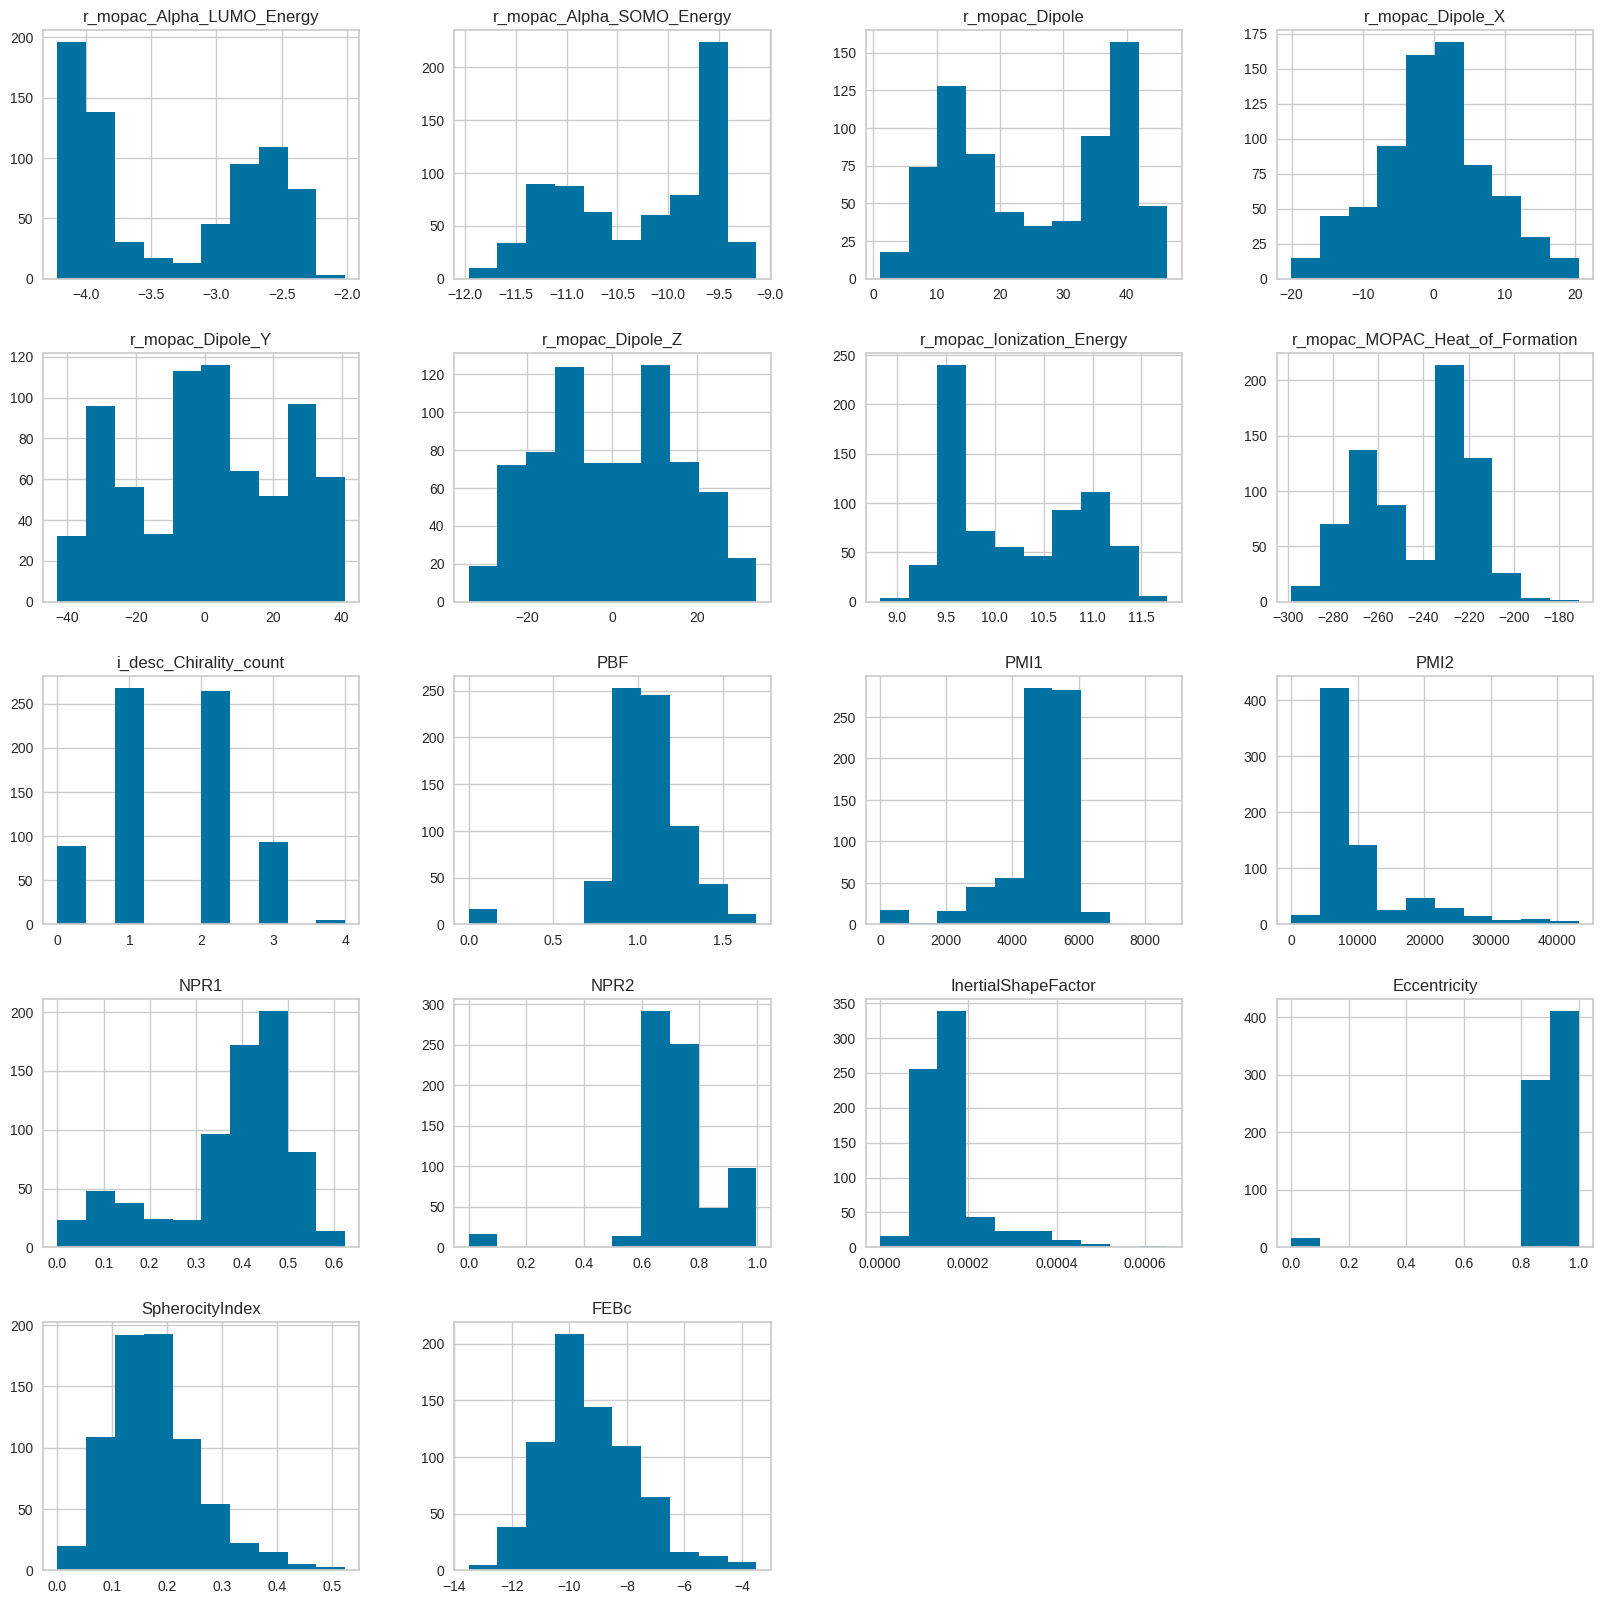

In [18]:
df.hist(figsize=(20, 20))

In [20]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes")
    else: print(feature, "no")

r_mopac_Alpha_LUMO_Energy no
r_mopac_Alpha_SOMO_Energy no
r_mopac_Dipole no
r_mopac_Dipole_X yes
r_mopac_Dipole_Y no
r_mopac_Dipole_Z no
r_mopac_Ionization_Energy no
r_mopac_MOPAC_Heat_of_Formation no
i_desc_Chirality_count yes
PBF yes
PMI1 yes
PMI2 yes
NPR1 no
NPR2 yes
InertialShapeFactor yes
Eccentricity no
SpherocityIndex yes
FEBc yes


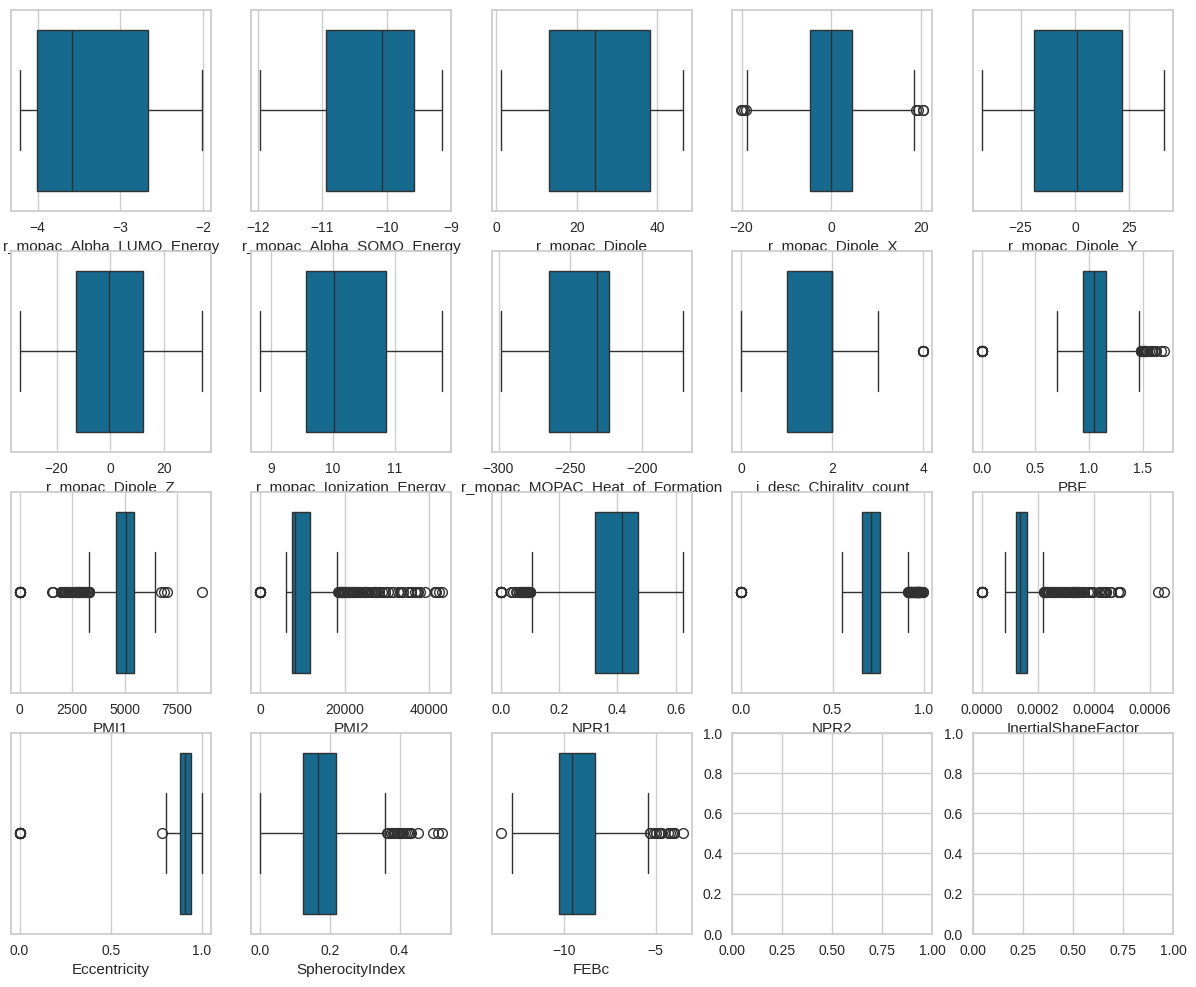

In [21]:
fig, ax = plt.subplots(4, 5, figsize=(15, 12))
for i, feature in enumerate(df):
    if i != 20:
        sns.boxplot(x=df[feature], ax=ax[i//5, i%5])

In [22]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 3*IQR
    upper = Q3 + 3*IQR
    df = df[df[feature] > lower]
    df = df[df[feature] < upper]
df

,r_mopac_Alpha_LUMO_Energy,r_mopac_Alpha_SOMO_Energy,r_mopac_Dipole,r_mopac_Dipole_X,r_mopac_Dipole_Y,r_mopac_Dipole_Z,r_mopac_Ionization_Energy,r_mopac_MOPAC_Heat_of_Formation,i_desc_Chirality_count,PBF,PMI1,PMI2,NPR1,NPR2,InertialShapeFactor,Eccentricity,SpherocityIndex,FEBc
0,-3.968,-9.466,40.425589,0.152708,-38.407425,12.612480,9.437856,-221.861111,3,0.895309,4811.759861,8072.405855,0.401044,0.672808,0.000140,0.916059,0.126871,-8.6
1,-4.063,-9.469,39.060058,-3.593674,33.119289,20.393292,9.469243,-222.341607,2,0.915579,5008.533139,7660.671610,0.423339,0.647508,0.000129,0.905971,0.140256,-8.9
2,-3.965,-9.595,38.679279,-11.327410,-29.596164,-22.177544,9.594976,-224.244498,1,0.900915,4434.485333,21162.262055,0.178920,0.853843,0.000193,0.983864,0.073827,-6.5
3,-2.690,-10.853,11.913102,3.246030,-9.454733,6.480226,10.772271,-264.353086,2,1.141172,5285.941424,7353.414791,0.480030,0.667783,0.000126,0.877252,0.215880,-9.2
4,-2.561,-10.662,13.122463,-5.019000,-7.402474,-9.602710,10.661890,-257.234743,3,1.071897,4870.107577,8614.702940,0.405556,0.717385,0.000147,0.914070,0.192731,-10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,-2.964,-11.410,13.900645,-8.587186,8.441699,-6.944487,11.271051,-267.839597,1,1.030296,4181.972883,8561.434911,0.367587,0.752533,0.000180,0.929989,0.182841,-6.6
713,-2.432,-10.263,21.567448,7.080087,-20.203846,2.613768,10.089219,-259.048631,2,1.305610,4954.179879,6453.647666,0.533544,0.695031,0.000140,0.845772,0.315966,-10.3
715,-4.075,-9.582,36.057802,-14.430384,-32.745848,4.431541,9.581773,-224.604059,2,1.045323,5138.150501,13227.146075,0.304933,0.784988,0.000153,0.952374,0.158852,-10.2
716,-2.387,-10.202,16.939629,13.662031,-5.601080,8.302279,10.201681,-261.275541,2,1.310273,3988.843601,20476.516215,0.176569,0.906410,0.000227,0.984288,0.162607,-10.2


In [28]:
sns.pairplot(df, hue="FEBc")

Error in callback <function flush_figures at 0x7b0e23d805e0> (for post_execute):


KeyboardInterrupt: 

In [29]:
y = df["FEBc"]
X = df.drop(columns=["FEBc"])

In [30]:
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [42]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

NameError: name 'LazyClassifier' is not defined

In [ ]:
print(models.head(10))

In [ ]:
models = []
models.append(("XGBClassifier", XGBClassifier(seed=42)))
models.append(("LogisticRegression", LogisticRegression(random_state=42)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=42)))
models.append(("CalibratedClassifierCV", CalibratedClassifierCV()))
models.append(("ExtraTreesClassifier", ExtraTreesClassifier(random_state=42)))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("PassiveAggressiveClassifier", PassiveAggressiveClassifier(random_state=42)))
models.append(("LinearSVC", LinearSVC(random_state=42)))
models.append(("SVC", SVC(random_state=42)))
models.append(("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()))
results = []
names = []

In [ ]:
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()